## Imports

In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
import seaborn.objects as so;
import Units
sns.set_theme()

Data imports

In [3]:
AList = np.loadtxt("./Data/1pe2e_acc/Acceleration.txt");
VList = np.loadtxt("./Data/1pe2e_acc/LatticeDepth.txt");

AVListIndex = np.loadtxt("./Data/1pe2e_acc/AVIndex.txt", dtype = int);
MomProb = np.loadtxt("./Data/1pe2e_acc/MomentumProbability.txt"); # np array with rows containing momentum probabilities for each [a,V] value pair in AVList

## Defining preliminary probabilities
- Define central values for acc and Lattice depth $(a_0,V_0)$ and corresponding _actual probability distirbution_ $P(p|a_0,V_0)$. .
- Import all other pairs of $(a,V)$ and their corresponding probabilitiy distributions $P(p|a,V)$ generated using the learned shaking sequence for $(a_0,V_0)$. 

In [7]:
PossibleMomentumOutcomes =np.array( [-10+2*i for i in range(0,11)]); # values of momentum in n\hbar k_L
PossibleOutcomes = range(0,11);


a0= 0.0; V0= 0.0;
P_actual= MomProb[int((AList.shape[0]-1)/2),:]

# This part of code is only for adding errors
epsilon = 0.0;
P_error = np.array( [ 0.00158886 ,  0.0289448  , 0.0129811 ,    0.17899  ,  0.028321,   0.0413507  ,  0.559008  , 0.0504661 ,  0.0788694  , 0.0194702 ,9.67359e-06]);

# This part of code is only for adding error terms
P_simulated=P_actual + epsilon*P_error;

P_actual=P_actual/np.sum(P_actual);
P_simulated=P_simulated/np.sum(P_simulated);

Generate samples from the $(a_0,V_0)$ probability distribution

In [8]:
Runs=2000; # How many simulated data do we want
outcomes = np.random.default_rng().choice(PossibleOutcomes,size=Runs, p = P_simulated);
unique, frequency = np.unique(outcomes, return_counts = True);

Check that the generated distribution does match actual probabilities $P(p|a_0,V_0)$.

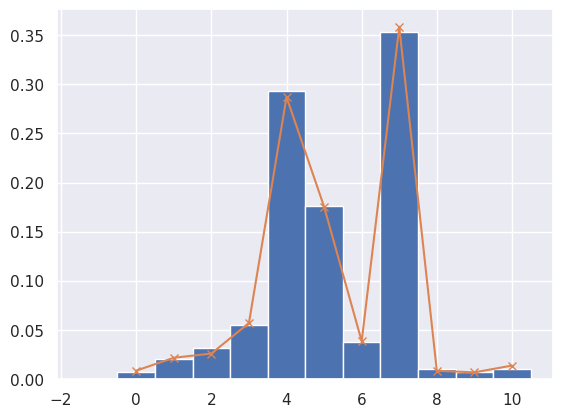

In [9]:
ax=plt.gca();
ax.hist(outcomes,  density = True,stacked = True, bins = np.arange(-1.5,11.5));
ax.plot(PossibleOutcomes, P_actual, 'x-');

## Bayesian Updating

In [10]:
PaVprior = np.full(AList.size,1)/(AList.size);
np.sum(PaVprior)

stdTime=[];
plotPaV=np.array([PaVprior]);

counter =0;
for m in outcomes:
    for i in range(AList.size):
        indexpair = AVListIndex[i];
        MomentumProbabilities = MomProb[i];

        PaVprior[indexpair[0]] *= (MomentumProbabilities[m])
        PaVprior/=np.sum(PaVprior)

    counter+=1;
    if counter % 50 == 0:
        plotPaV=np.append(plotPaV,[PaVprior], axis=0); 
    

    
    mean = np.dot(AList, PaVprior)
    sq = np.dot (np.power(AList, 2), PaVprior)
    stdTime.append(np.sqrt( sq- mean**2));

## Plotting

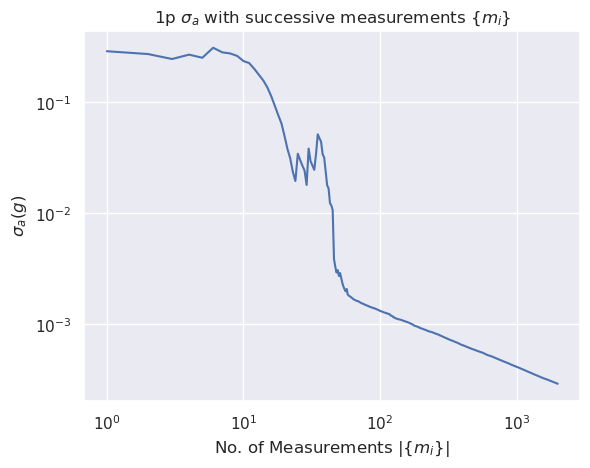

In [12]:
plt.loglog(range(1, len(outcomes)+1),np.array(stdTime)*Units.accUnit/Units.g)
plt.xlabel("No. of Measurements $|\{m_i\}|$");
plt.ylabel("$\sigma_a (g)$")
plt.title("1p $\sigma_a$ with successive measurements $\{m_i\}$")
plt.grid('both')
plt.savefig("stddev.png")

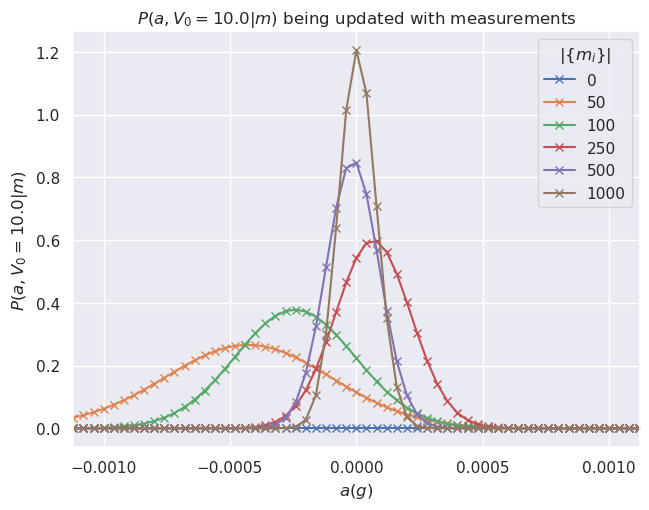

In [28]:
ax= plt.gca();
plotrange= [0,1,2,5,10, 20]
for i in plotrange:
    plt.plot(AList,plotPaV[i]*Units.accUnit/Units.g, 'x-',label=str(i*50),);
plt.tight_layout()
plt.xlabel("$a (g)$")
plt.ylabel("$P(a,V_0=10.0|m)$")
plt.title("$P(a,V_0=10.0|m)$ being updated with measurements")
plt.grid('both')
plt.xlim(-0.0002*Units.accUnit/Units.g,0.0002*Units.accUnit/Units.g)
plt.locator_params(axis='x', nbins=5) 
plt.legend(title="$|\{m_i\}|$")

plt.savefig("zoomedinacc.png");
plt.show();

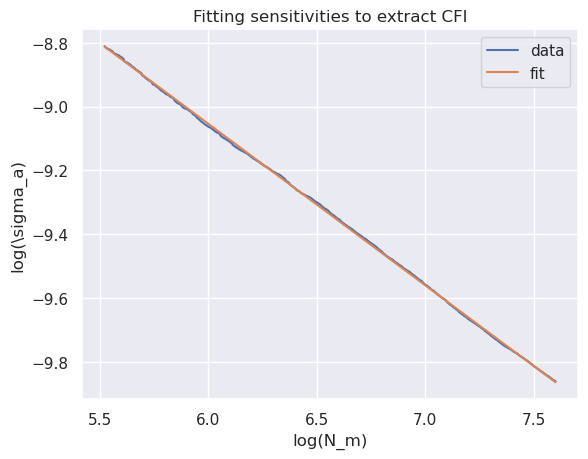

In [29]:
x = np.log(range(250, len(stdTime)+1))
y = np.log(np.array(stdTime[ 249:]));

(m,b), (SSE,),*_ =np.polyfit(x, y, deg=1, full=True)
plt.plot(x,y, label="data")

plt.plot(x,m*x+b, label="fit")
plt.xlabel('log(N_m)')
plt.ylabel("log(\sigma_a)")
plt.legend()
plt.title("Fitting sensitivities to extract CFI")
plt.grid(True)
plt.savefig('Fitsens.png')


In [30]:
cfibayesian = np.exp(-2*b)
print(cfibayesian)
n_p =4; T= 32*np.pi/11.5; print(T)
F_MZ = (2*n_p *T**2)**2/4
print(cfibayesian/F_MZ)

170480.98348436263
8.741823036075946
1.8245170106508044


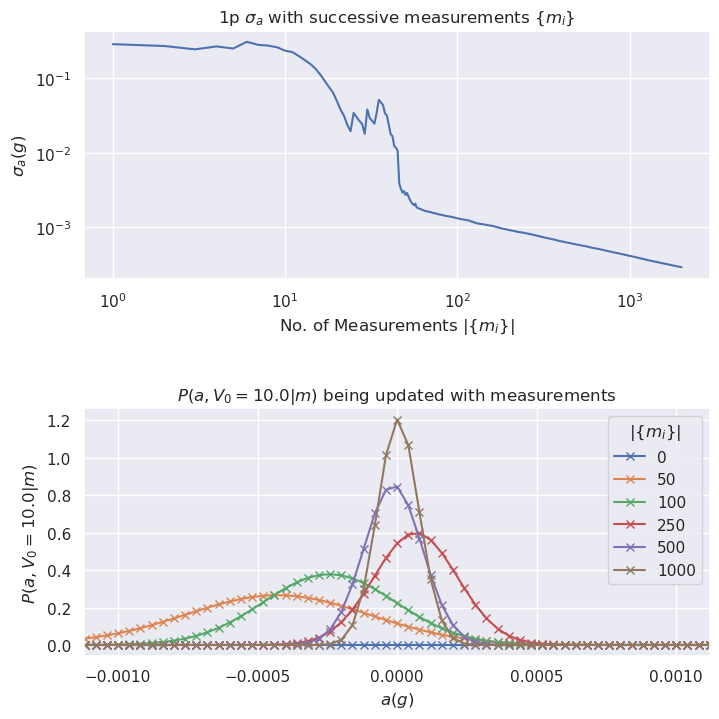

In [60]:
fig, (ax1, ax2) = plt.subplots(2,1 ,figsize=(8, 8))

ax1.loglog(range(1, len(outcomes)+1),np.array(stdTime)*Units.accUnit/Units.g)
ax1.set_xlabel("No. of Measurements $|\{m_i\}|$");
ax1.set_ylabel("$\sigma_a (g)$")
ax1.set_title("1p $\sigma_a$ with successive measurements $\{m_i\}$")
ax1.grid('both')
#plt.savefig("stddev.png")

plotrange= [0,1,2,5,10, 20]
for i in plotrange:
    ax2.plot(AList,plotPaV[i]*Units.accUnit/Units.g, 'x-',label=str(i*50),);
ax2.set_xlabel("$a (g)$")
ax2.set_ylabel("$P(a,V_0=10.0|m)$")
ax2.set_title("$P(a,V_0=10.0|m)$ being updated with measurements")
ax2.grid('both')
ax2.set_xlim(-0.0002*Units.accUnit/Units.g,0.0002*Units.accUnit/Units.g)
ax2.locator_params(axis='x', nbins=5) 
ax2.legend(title="$|\{m_i\}|$")

fig.tight_layout(pad=3.0)
plt.savefig("1param_Bayesian.pdf")